<a href="https://colab.research.google.com/github/paulaanb/Q-learning/blob/main/q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan las bibliotecas necesarias, como Gym para el entorno de aprendizaje por refuerzo, NumPy para operaciones matriciales, Matplotlib para la visualización y otras utilidades.

In [1]:
# Importamos las bibliotecas necesarias
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

Se crea el entorno Frozen Lake, un entorno clásico de aprendizaje por refuerzo donde un agente debe navegar un lago congelado para llegar al objetivo sin caer en agujeros. is_slippery=False se utiliza para desactivar el deslizamiento en el hielo.
Se reinicia el entorno y se imprime su representación visual.

In [ ]:
# Inicializa el entorno Frozen Lake
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()
environment.render()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Se obtienen el número de estados y acciones posibles en el entorno.
Se inicializa la tabla Q con ceros, donde qtable[state, action] representa el valor de la acción para el estado dado.

In [ ]:
# Inicializa la tabla Q con ceros
nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable = np.zeros((nb_states, nb_actions))




Se imprime la tabla Q inicial antes del entrenamiento.


In [ ]:
# Visualiza la tabla Q inicial
print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Se definen los hiperparámetros del algoritmo, como el número de episodios (episodes), la tasa de aprendizaje (alpha), y el factor de descuento (gamma).

In [ ]:
# Hiperparámetros
episodes = 1000
alpha = 0.5
gamma = 0.9

In [ ]:
# Lista de resultados para graficar
outcomes = []

print('Q-table antes del entrenamiento:')
print(qtable)

Q-table antes del entrenamiento:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Se realiza el entrenamiento del agente a lo largo de múltiples episodios.
En cada episodio, el agente toma acciones, actualiza la tabla Q y ajusta su comportamiento basándose en las recompensas obtenidas.

In [ ]:

# Entrenamiento
for _ in range(episodes):
    state = environment.reset()
    done = False
    outcomes.append("Failure")

    while not done:
        # Elige la acción con el valor más alto en el estado actual
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        # Si no hay una mejor acción (solo ceros), elige una aleatoria
        else:
            action = environment.action_space.sample()

        # Implementa la acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualiza Q(s,a)
        qtable[state, action] = qtable[state, action] + alpha * (
            reward + gamma * np.max(qtable[new_state]) - qtable[state, action]
        )

        # Actualiza el estado actual
        state = new_state

        # Si hay una recompensa, significa que nuestro resultado es un éxito
        if reward:
            outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table después del entrenamiento:')
print(qtable)


Q-table después del entrenamiento:
[[0.       0.59049  0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.6561   0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.253125 0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.729    0.      ]
 [0.       0.       0.81     0.      ]
 [0.       0.9      0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.225    0.      ]
 [0.       0.       1.       0.      ]
 [0.       0.       0.       0.      ]]


Se utiliza Matplotlib para crear un gráfico de barras que muestra los resultados de cada episodio (éxito o fracaso).

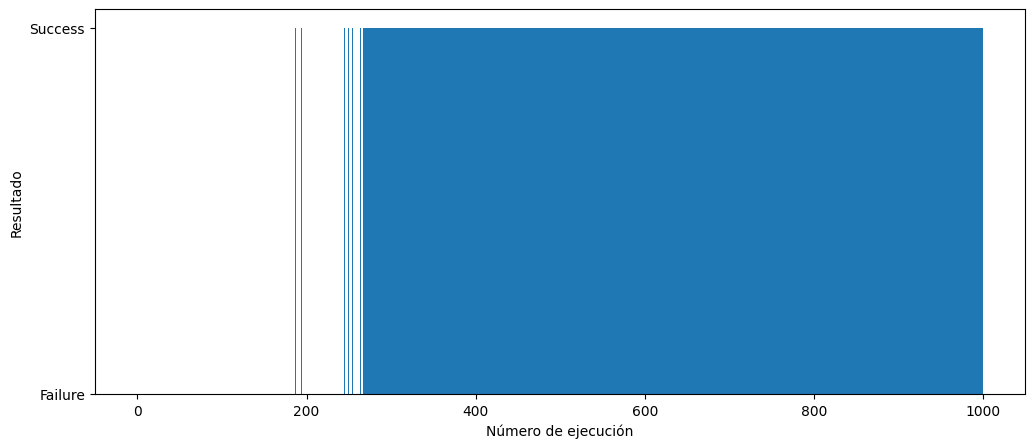

In [ ]:
# Graficar resultados
plt.figure(figsize=(12, 5))
plt.xlabel("Número de ejecución")
plt.ylabel("Resultado")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

Se evalúa el desempeño del agente después del entrenamiento en un número adicional de episodios.

In [ ]:
# Evaluación
episodes_eval = 100
success_count = 0

for _ in range(episodes_eval):
    state = environment.reset()
    done = False

    while not done:
        # Elige la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implementa la acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualiza el estado actual
        state = new_state

        # Cuando obtenemos una recompensa, significa que hemos resuelto el juego
        success_count += reward

Se calcula y muestra la tasa de éxito del agente, que representa el porcentaje de episodios en los que el agente alcanzó el objetivo después del entrenamiento

In [ ]:
# Verificar la tasa de éxito
success_rate = success_count / episodes_eval * 100
print(f"Tasa de éxito = {success_rate}%")


Tasa de éxito = 100.0%


**Algoritmo Epsilon-Greedy**

Se crea el entorno Frozen Lake sin resbalones (is_slippery=False) y se inicializa la tabla Q con ceros. La tabla Q representa los valores de acción estimados para cada estado y acción posible.

In [ ]:
# Inicializar el entorno Frozen Lake resbaladizo
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()


0

In [ ]:
# Inicializar la tabla Q
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))


In [ ]:
# Hiperparámetros
episodios = 1000        # Número total de episodios
alpha = 0.5             # Tasa de aprendizaje
gamma = 0.9             # Factor de descuento
epsilon = 1.0           # Cantidad de aleatoriedad en la selección de acciones
epsilon_decay = 0.001   # Cantidad fija para disminuir epsilon

In [ ]:
# Lista de resultados para graficar
resultados = []

print('Tabla Q antes del entrenamiento:')
print(qtable)

Tabla Q antes del entrenamiento:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


En cada episodio, el agente elige una acción utilizando la política epsilon-greedy.
Se actualiza la tabla Q utilizando la ecuación de actualización de Q, que incorpora la recompensa inmediata y la estimación del valor futuro.

In [ ]:

# Entrenamiento
for _ in range(episodios):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que el resultado es un fracaso
    resultados.append("Fracaso")

    # Hasta que el agente quede atrapado en un hoyo o alcance la meta, seguir entrenándolo
    while not done:
        # Generar un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < epsilon, tomar una acción aleatoria
        if rnd < epsilon:
            action = environment.action_space.sample()
        # De lo contrario, tomar la acción con el valor más alto en el estado actual
        else:
            action = np.argmax(qtable[state])

        # Implementar esta acción y mover al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s,a) utilizando la ecuación de actualización de Q
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si hay recompensa, significa que nuestro resultado es un éxito
        if done and reward:
            resultados[-1] = "Éxito"

    # Actualizar epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Tabla Q después del entrenamiento:')
print(qtable)



Tabla Q después del entrenamiento:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.59015556 0.58924497]
 [0.59048102 0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.65609998 0.80999998 0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80998129 0.9        0.72880837]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


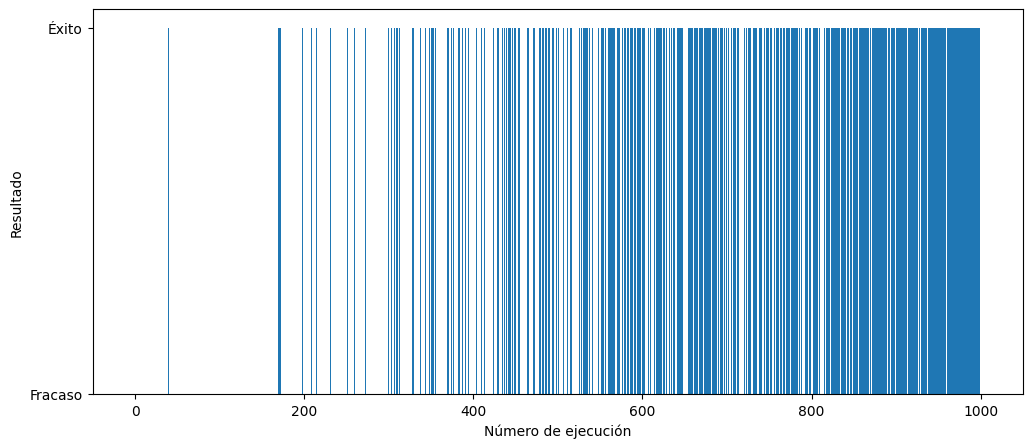

In [ ]:
# Graficar resultados
plt.figure(figsize=(12, 5))
plt.xlabel("Número de ejecución")
plt.ylabel("Resultado")
ax = plt.gca()
plt.bar(range(len(resultados)), resultados, width=1.0)
plt.show()

El agente realiza acciones utilizando la política óptima aprendida y se evalúa su desempeño.

In [ ]:
# Evaluación
episodios_evaluacion = 100
conteo_exitos = 0

for _ in range(episodios_evaluacion):
    state = environment.reset()
    done = False

    # Hasta que el agente quede atrapado o alcance la meta, seguir evaluándolo
    while not done:
        # Elegir la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implementar esta acción y mover al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

    # Cuando llegamos a la meta, incrementar el conteo de éxitos
    if reward == 1:
        conteo_exitos += reward


In [ ]:
# Verificar nuestra tasa de éxito
tasa_exito = conteo_exitos / episodios_evaluacion * 100
print(f"Tasa de éxito = {tasa_exito}%")

Tasa de éxito = 100.0%


Este código implementa el algoritmo Epsilon-Greedy para el aprendizaje por refuerzo en el entorno Frozen Lake. La política epsilon-greedy equilibra la exploración (acciones aleatorias) con la explotación (acciones basadas en el conocimiento actual). La tabla Q se actualiza a medida que el agente explora y aprende de su experiencia. La evaluación final mide la tasa de éxito del agente después del entrenamiento.

 **Desafío: lago helado resbaladizo**

Se crea el entorno Frozen Lake con hielo resbaladizo y se inicializa la tabla Q con ceros.

In [ ]:
# Inicializar el lago con hielo resbaladizo
entorno = gym.make("FrozenLake-v1", is_slippery=True)
entorno.reset()


0

In [ ]:
# Inicializar la tabla Q
tabla_q = np.zeros((entorno.observation_space.n, entorno.action_space.n))

Se definen los parámetros importantes del algoritmo

In [ ]:

# Hiperparámetros
episodios = 5000        # Aumentamos el número de episodios
alfa = 0.1              # Incrementamos la tasa de aprendizaje
gamma = 0.95            # Incrementamos el factor de descuento
epsilon = 1.0           # Cantidad de aleatoriedad en la selección de acciones
epsilon_decaimiento = 0.0005  # Ajustamos la tasa de decaimiento



In [ ]:
# Lista de resultados para graficar
resultados = []

print('Tabla Q antes del entrenamiento:')
print(tabla_q)



Tabla Q antes del entrenamiento:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Se realiza el entrenamiento del agente mediante Q-learning utilizando la estrategia epsilon-greedy para la selección de acciones

In [ ]:
# Entrenamiento
for episodio in range(episodios):
    estado = entorno.reset()
    hecho = False

    # Por defecto, consideramos que el resultado es un fracaso
    resultados.append("Fracaso")

    # Hasta que el agente quede atrapado en un agujero o alcance la meta, seguir entrenándolo
    while not hecho:
        # Generar un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < epsilon, tomar una acción aleatoria
        if rnd < epsilon:
            accion = entorno.action_space.sample()
        # De lo contrario, tomar la acción con el valor más alto en el estado actual
        else:
            accion = np.argmax(tabla_q[estado])

        # Implementar esta acción y mover al agente en la dirección deseada
        nuevo_estado, recompensa, hecho, info = entorno.step(accion)

        # Actualizar Q(s,a)
        tabla_q[estado, accion] = tabla_q[estado, accion] + \
                                  alfa * (recompensa + gamma * np.max(tabla_q[nuevo_estado]) - tabla_q[estado, accion])

        # Actualizar nuestro estado actual
        estado = nuevo_estado

        # Si obtenemos una recompensa, significa que nuestro resultado es un éxito
        if recompensa:
            resultados[-1] = "Éxito"

    # Actualizar epsilon
    epsilon = max(epsilon - epsilon_decaimiento, 0)

print()
print('===========================================')
print('Tabla Q después del entrenamiento:')
print(tabla_q)




Tabla Q después del entrenamiento:
[[0.18331211 0.12005615 0.11929526 0.11971206]
 [0.08577006 0.08596751 0.09404221 0.16248164]
 [0.15956918 0.10434342 0.10354125 0.10440818]
 [0.0528644  0.05260685 0.04525014 0.10574522]
 [0.20766301 0.1283975  0.12401915 0.08934119]
 [0.         0.         0.         0.        ]
 [0.21733761 0.04829102 0.05159734 0.02614701]
 [0.         0.         0.         0.        ]
 [0.14505879 0.15766189 0.17643647 0.26976912]
 [0.22058992 0.38739797 0.19532561 0.18759113]
 [0.51089754 0.2065608  0.20822296 0.16539714]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.25549628 0.34272942 0.52077267 0.33480112]
 [0.46195671 0.71527955 0.5052737  0.49890732]
 [0.         0.         0.         0.        ]]


Se utiliza Matplotlib para crear un gráfico de barras que muestra los resultados de cada episodio (éxito o fracaso)

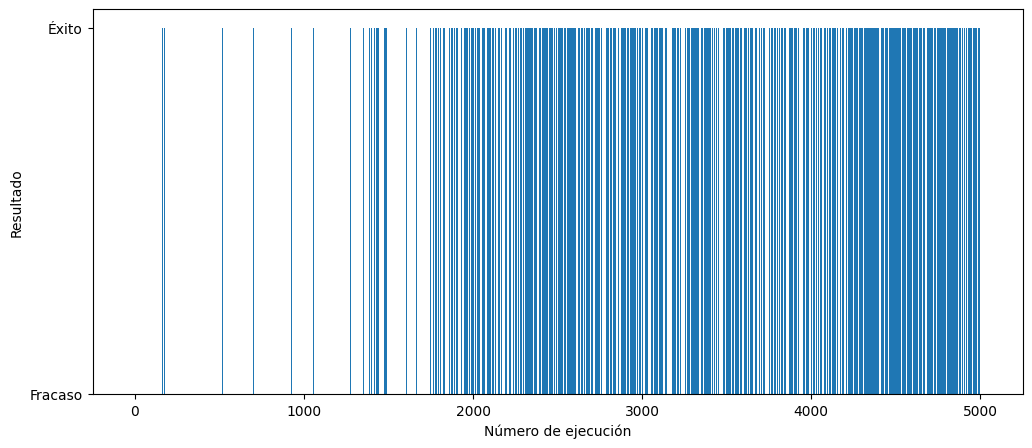

In [ ]:
# Graficar resultados
plt.figure(figsize=(12, 5))
plt.xlabel("Número de ejecución")
plt.ylabel("Resultado")
ax = plt.gca()
plt.bar(range(len(resultados)), resultados, width=1.0)
plt.show()


Se evalúa el desempeño del agente después del entrenamiento en un conjunto separado de episodios

In [ ]:

# Evaluación
episodios_evaluacion = 100
num_exitos = 0

for _ in range(episodios_evaluacion):
    estado = entorno.reset()
    hecho = False

    # Hasta que el agente quede atrapado o alcance la meta, seguir entrenándolo
    while not hecho:
        # Elegir la acción con el valor más alto en el estado actual
        accion = np.argmax(tabla_q[estado])

        # Implementar esta acción y mover al agente en la dirección deseada
        nuevo_estado, recompensa, hecho, info = entorno.step(accion)

        # Actualizar nuestro estado actual
        estado = nuevo_estado

        # Cuando obtenemos una recompensa, significa que resolvimos el juego
        num_exitos += recompensa

Se calcula y muestra la tasa de éxito del agente en la evaluación

In [ ]:

# Verificar nuestra tasa de éxito
tasa_exito = num_exitos / episodios_evaluacion * 100
print(f"Tasa de éxito = {tasa_exito}%")

Tasa de éxito = 78.0%


**Decisiones tomadas y desafíos:**

- Consideración del Hielo Resbaladizo (is_slippery=True):
En este fragmento de código, se ha optado por emplear el entorno con hielo resbaladizo, lo que implica que las acciones ejecutadas pueden no producir los resultados anticipados debido al efecto del deslizamiento.

- Ajustes en el Número de Episodios y Tasa de Aprendizaje:
Se han realizado ajustes en dos parámetros críticos para el aprendizaje: el número de episodios se ha incrementado significativamente (episodios = 5000), lo que proporciona al agente más oportunidades de interactuar y aprender del entorno. Además, se ha aumentado la tasa de aprendizaje (alfa = 0.1) para favorecer un ajuste más rápido y receptivo de la tabla Q.

- Dinámica de la Tasa de Exploración (Epsilon-Greedy):
Se ha implementado una estrategia epsilon-greedy para gestionar el dilema entre exploración y explotación. La tasa de exploración (epsilon) disminuye con el tiempo, lo que implica que, a medida que el agente acumula conocimiento, se vuelve más propenso a explotar las acciones aprendidas y menos propenso a realizar exploraciones aleatorias. Este enfoque busca equilibrar la adquisición de información y la toma de decisiones informada durante el proceso de aprendizaje.

**Reflexiones sobre el aprendizaje por refuerzo:**
- Balance entre Exploración y Explotación:
La estrategia epsilon-greedy equilibra la exploración, permitiendo al agente descubrir nuevas acciones, y la explotación, donde utiliza su conocimiento actual para tomar decisiones informadas.
- Proceso de Aprendizaje Incremental:
En el aprendizaje por refuerzo, el agente experimenta un progreso gradual a medida que interactúa con el entorno, ajustando sus estrategias en función de las recompensas obtenidas.
- Adaptabilidad y Superación de Complejidades:
A diferencia de las soluciones basadas en condicionales if...else, el aprendizaje por refuerzo destaca por su capacidad para adaptarse a entornos complejos y dinámicos. En estos contextos, donde las reglas exactas pueden ser difíciles de predefinir, el aprendizaje por refuerzo demuestra ser más eficaz.
- Desafíos Introducidos por el Hielo Resbaladizo:
La inclusión de un componente de hielo resbaladizo agrega un nivel de incertidumbre, haciendo que la toma de decisiones sea aún más desafiante para el agente. Este factor incrementa la complejidad y la necesidad de estrategias adaptables.